# Stacking Ensemble Machine Learning

## Import Libraries

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

In [2]:
# Import libraries for plotting the graphs
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [3]:
# Set theme
sns.set_theme(style='white')

## Load Datasets

In [62]:
x_train = pd.read_pickle('../Data/x_train.pkl')
y_train = pd.read_pickle('../Data/y_train.pkl')
x_test = pd.read_pickle('../Data/x_test.pkl')
y_test = pd.read_pickle('../Data/y_test.pkl')

In [63]:
merge = pd.concat([x_train,x_test], axis=0, join='inner')

In [5]:
kasumi = pd.read_pickle('../Data/deci_flongle_runs.pkl')

In [6]:
labels = pd.read_excel('../Data/Combined_Datasets/labelsCOG_WHOClass.xlsx', index_col=0)
labels2 = labels[labels.index.isin(list(y_train.index))]

### PCA

In [7]:
from sklearn.decomposition import PCA

# Fit PCA
pca_decomp = PCA(random_state=42, n_components=2)
data_PCs = pca_decomp.fit_transform(x_train)

In [8]:
def draw_scatterplot(score, hue=None):
    
    sns.set_theme(style="white", color_codes=True)

    # Define variables
    score2 = score[:,0:2]
    xs = score2[:,0]
    ys = score2[:,1]

    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Define scatterplot

    sns.scatterplot(x=xs * scalex, y=ys * scaley,
                    palette='husl', s=10,
                    linewidth=0, alpha=1,
                    data=y_train, hue=hue)

    # Define plot specs
    plt.title("PCA Decomposition by, n= "+ str(len(score2)),
               fontsize = 12)       
               
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.tight_layout()
    
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Save figure
    # if(hue):
    #     plt.savefig('../Plots/PCA_by_' + hue + '.png',
    #     bbox_inches='tight', dpi=300)
    # else:
    #     plt.savefig('../Plots/PCA.png',
    #     bbox_inches='tight', dpi=300)

    return(plt.show())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


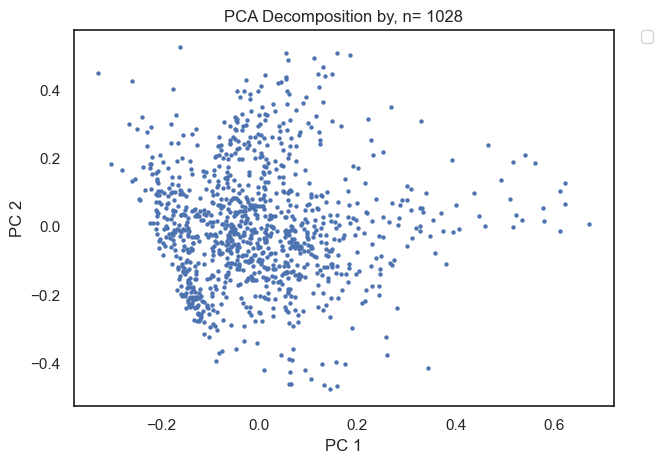

In [9]:
draw_scatterplot(data_PCs)

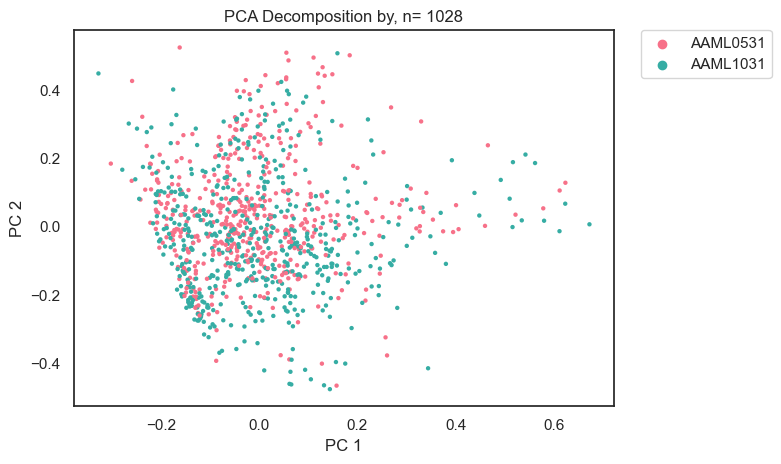

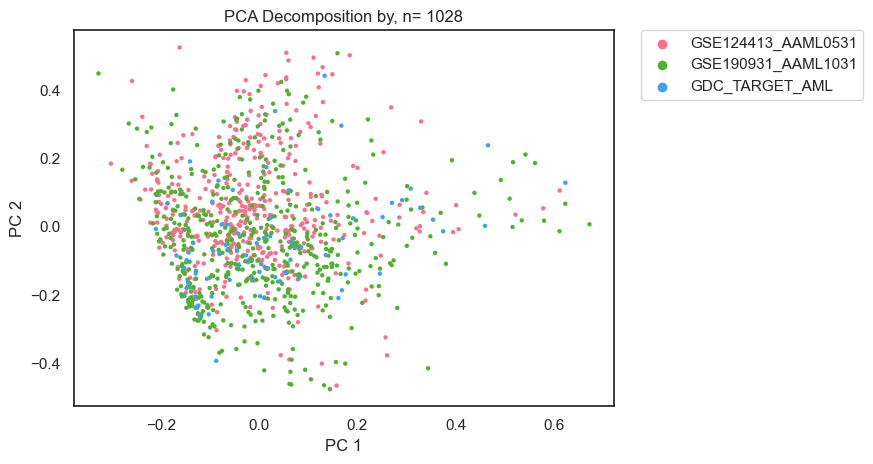

In [10]:
draw_scatterplot(data_PCs, hue="Clinical Trial")
draw_scatterplot(data_PCs, hue="Batch")

## Feature Extraction

### PacMap

In [11]:
import pacmap

In [71]:
reducer = pacmap.PaCMAP(n_components=2, n_neighbors=15, 
                            MN_ratio=0.5, FP_ratio=10.0,random_state=42,
                            lr=0.1, num_iters=4500, verbose=False)
# Fit the training set
embedding = reducer.fit_transform(x_train)

c:\ProgramData\mambaforge\lib\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


## Data Visualization

In [13]:
y_train['Methyl Class'] = labels2[labels2['WHO Classification'].isin(['KMT2A-rearrangement',
                                                              'Other or Undefined',
                                                              't(8;21)(q22;q22); RUNX1::RUNX1T1',
                                                              'inv(16)(p13.1q22) or t(16;16)(p13.1;q22); CBFB::MYH11',
                                                              'NUP98-fusion',
                                                              'Cytogenetically Normal',
                                                              'mutated CEBPA'])]['WHO Classification']
                                              
y_train['Methyl Class'] = y_train['Methyl Class'].fillna('Other or Undefined')

In [52]:
def draw_PacMAP(score,hue=None, labels=y_train):
    
    sns.set_theme(style="white", color_codes=True)

    # Define variables
    score2 = score[:,0:2]
    xs = score2[:,0]
    ys = score2[:,1]

    # Define scatterplot
    plt.subplots(figsize=(7, 5)) 
    sns.scatterplot(data=labels, x=xs, y=ys,
                    s=10,hue=hue,
                    linewidth=0, alpha=0.8)

          
    plt.xlabel("PacMAP 1")
    plt.ylabel("PacMAP 2")
    plt.tight_layout()
    plt.xlim(-40,40)
    plt.ylim(-50,50)
    plt.grid(True)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # Define plot specs

    if hue != None:
        plt.title("PacMAP by " + hue + ", n= "+ str(len(score2)),
                  fontsize = 12)
        plt.savefig('../Figures/PacMAP/' + hue + '.png',
                    bbox_inches='tight', dpi=300)
    else:
        plt.title("PacMAP Projection, n= "+ str(len(score2)),
                  fontsize = 12)
        plt.savefig('../Figures/PacMAP/PacMAP_Projection.png',
                    bbox_inches='tight', dpi=300)

    return(plt.show())

In [37]:
y_train.columns.to_list()

['Patient_ID',
 'TARGET USI',
 'Sex',
 'Race or ethnic group',
 'Hispanic or Latinx ethnic group',
 'Age at Diagnosis in Days',
 'First Event',
 'Event Free Survival Time in Days',
 'Vital Status',
 'Overall Survival Time in Days',
 'Year of Diagnosis',
 'Year of Last Follow Up',
 'Clinical Trial',
 'WBC Count (G/L)',
 'BM Leukemic blasts (%)',
 'Peripheral blasts (%)',
 'CNS disease',
 'Chloroma',
 'FAB Category',
 't(6;9)',
 't(8;21)',
 't(3;5)(q25;q34)',
 't(6;11)(q27;q23)',
 't(9;11)(p22;q23)',
 't(10;11)(p11.2;q23)',
 't(11:19)(q23:p13.1)',
 'inv(16)',
 'del5q',
 'del7q',
 'del9q',
 'monosomy 5',
 'monosomy 7',
 'trisomy 8',
 'trisomy 21',
 'MLL',
 'Minus Y',
 'Minus X',
 'Cytogenetic Code Other',
 'Cytogenetic Complexity',
 'Primary Cytogenetic Code',
 'ISCN',
 'FLT3 ITD',
 'FLT3/ITD allelic ratio',
 'FLT3 PM',
 'NPM mutation',
 'CEBPA mutation',
 'WT1 mutation',
 'c-Kit Mutation Exon 8',
 'c-Kit Mutation Exon 17',
 'MRD at end of course 1',
 'MRD % at end of course 1',
 'MRD at 

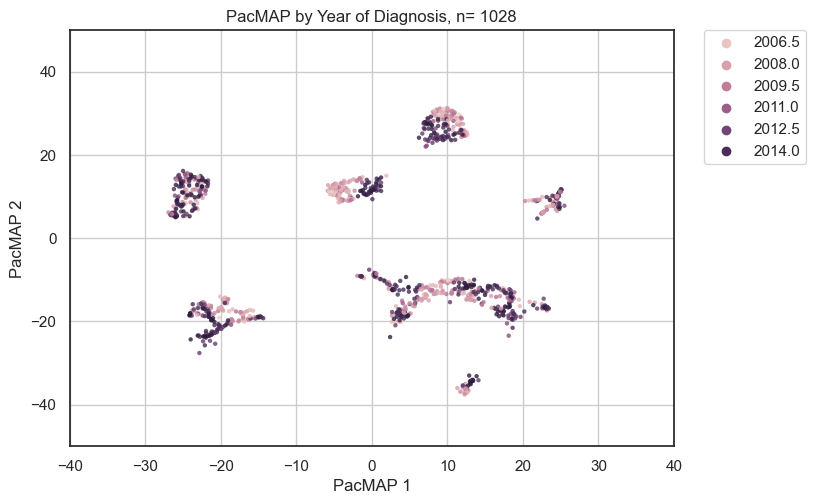

In [87]:
draw_PacMAP(embedding, hue= 'Year of Diagnosis')

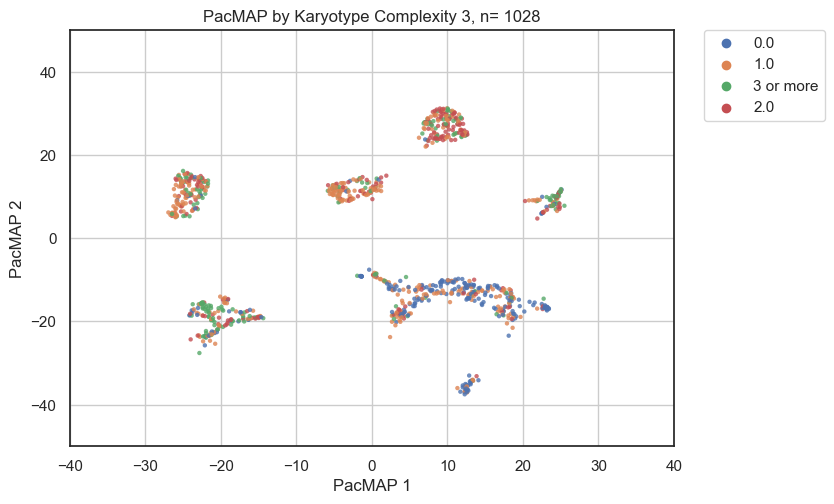

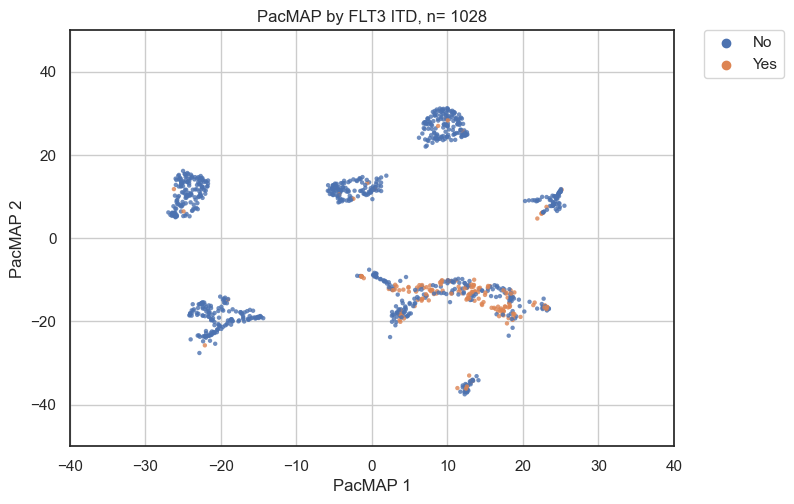

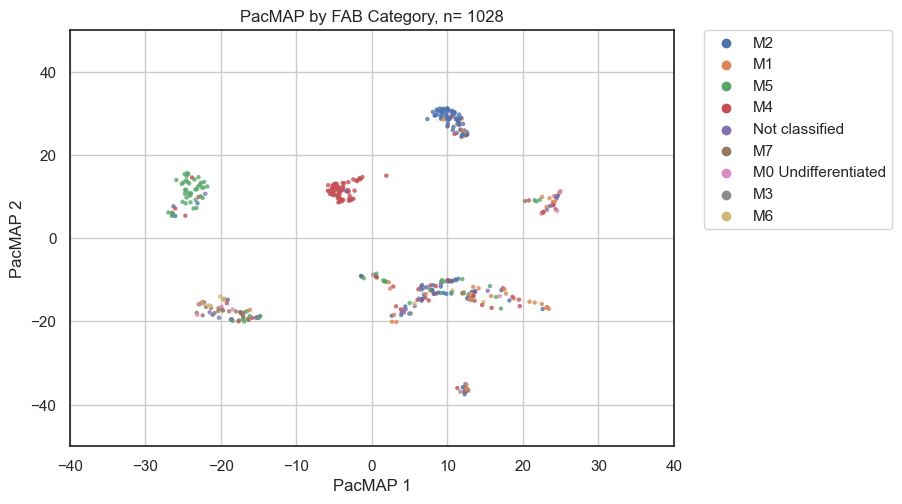

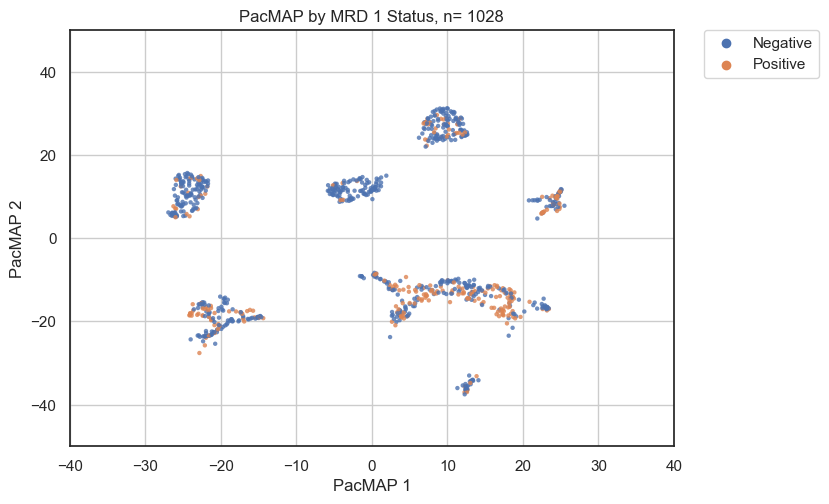

In [74]:
draw_PacMAP(embedding, hue= 'Karyotype Complexity 3')
draw_PacMAP(embedding, hue= 'FLT3 ITD')
draw_PacMAP(embedding, hue= 'FAB Category')
draw_PacMAP(embedding, hue= 'MRD 1 Status')

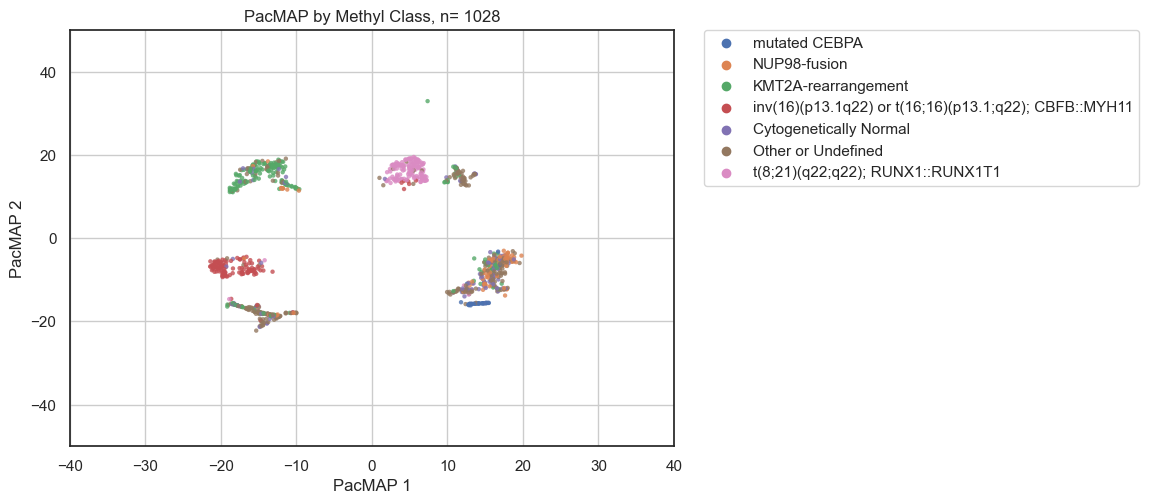

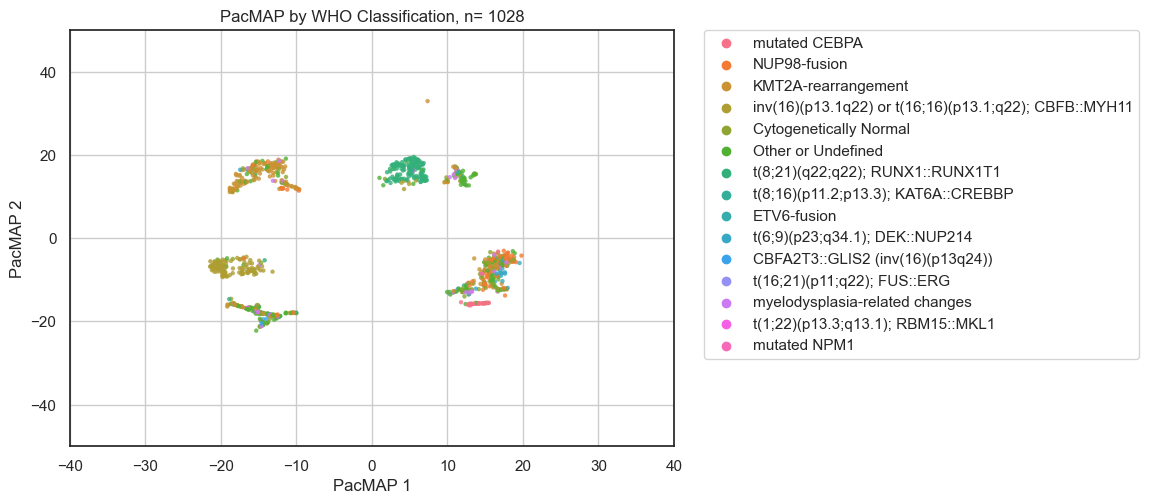

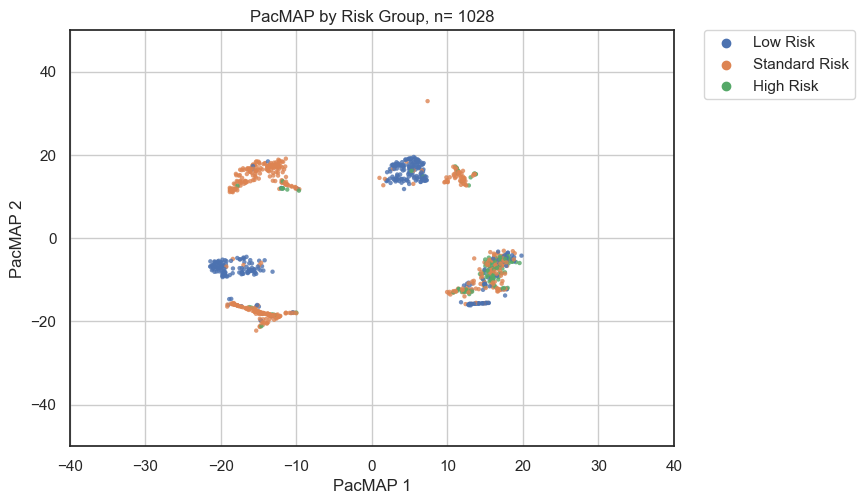

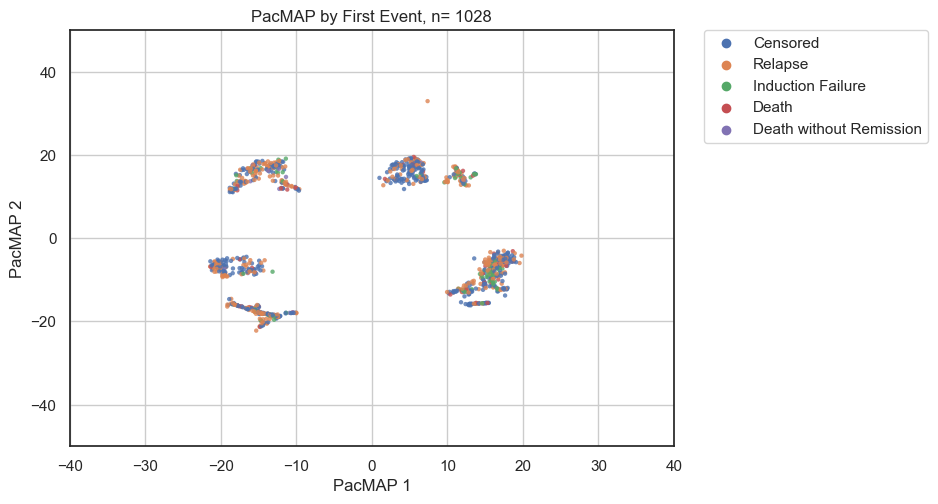

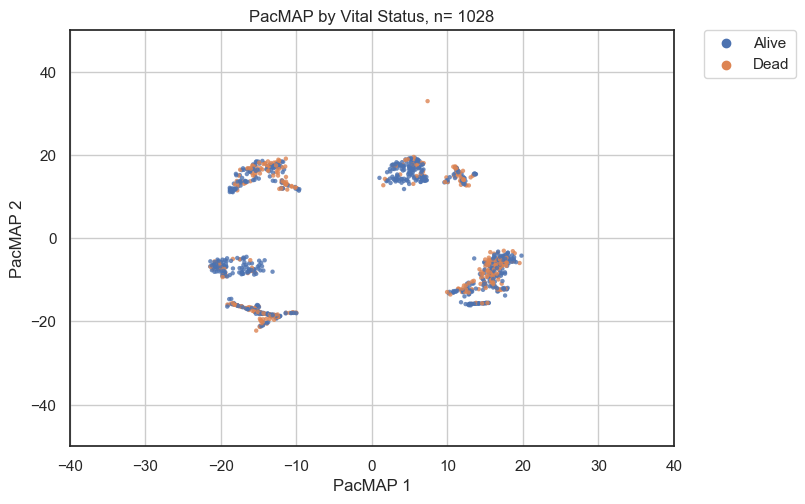

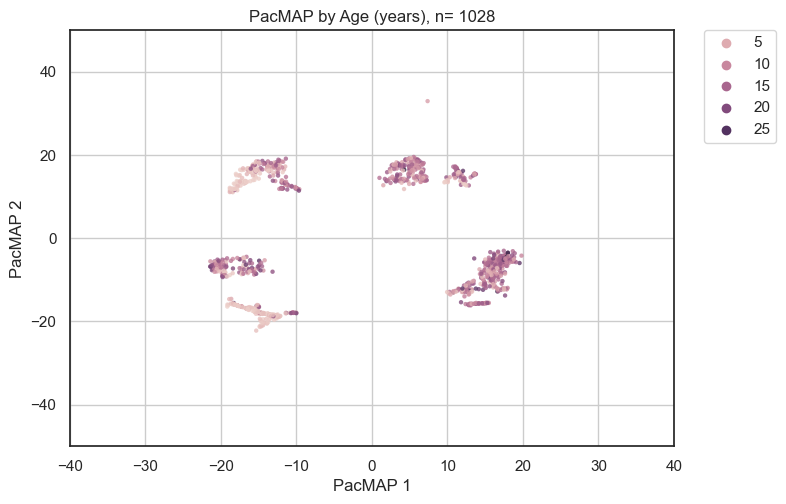

In [70]:
draw_PacMAP(embedding, hue= 'Methyl Class')
draw_PacMAP(embedding, hue= 'WHO Classification', labels=labels2)
draw_PacMAP(embedding, hue= 'Risk Group')
draw_PacMAP(embedding, hue= 'First Event')
draw_PacMAP(embedding, hue= 'Vital Status')
draw_PacMAP(embedding, hue= 'Age (years)')

In [ ]:

draw_PacMAP(embedding, hue= 'Methyl Class')
draw_PacMAP(embedding, hue= 'WHO Classification', labels=labels2)
draw_PacMAP(embedding, hue= 'Risk Group')
draw_PacMAP(embedding, hue= 'First Event')
draw_PacMAP(embedding, hue= 'Vital Status')
draw_PacMAP(embedding, hue= 'Age (years)')

## Set Controls

In [17]:
neg_control = pd.DataFrame(data=np.zeros(x_train.shape[1]),index=x_train.columns, columns=['All Unmethylated']).T
pos_control = pd.DataFrame(data=np.ones(x_train.shape[1]),index=x_train.columns, columns=['All Methylated']).T
neutral_control = pd.DataFrame(data=np.full(shape=x_train.shape[1],fill_value=0.5,dtype=float),index=x_train.columns,columns=['All half-methylated']).T

controls = pd.concat([neg_control,pos_control,neutral_control])

In [18]:
# Transform the test set into the same embedding space

embedding_test = reducer.transform(controls, basis=x_train.copy())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

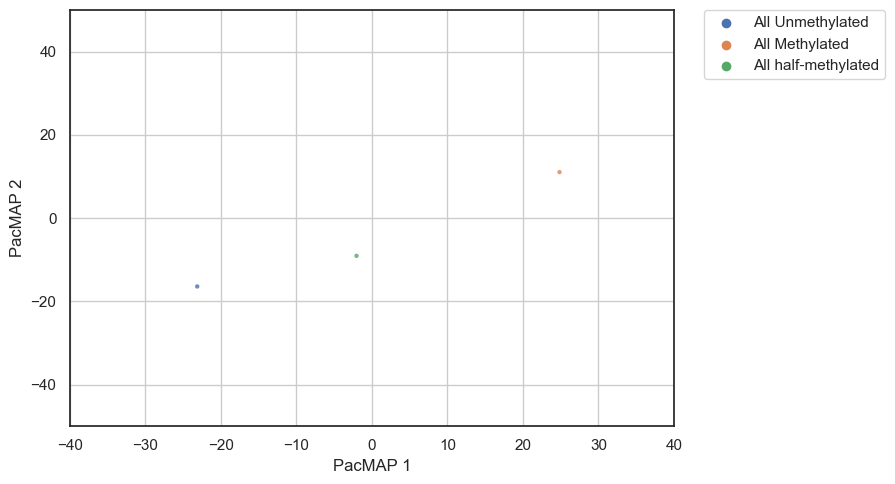

In [19]:
draw_PacMAP(embedding_test, labels=None, hue=controls.index)

## Define St Jude Test

In [20]:
x_test2 = x_test.T.join(x_train.columns.to_frame(name='index'),how='right').set_index('index').T

In [21]:
embedding_test2 = reducer.transform(x_test2.fillna(0.5), basis=x_train.copy())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


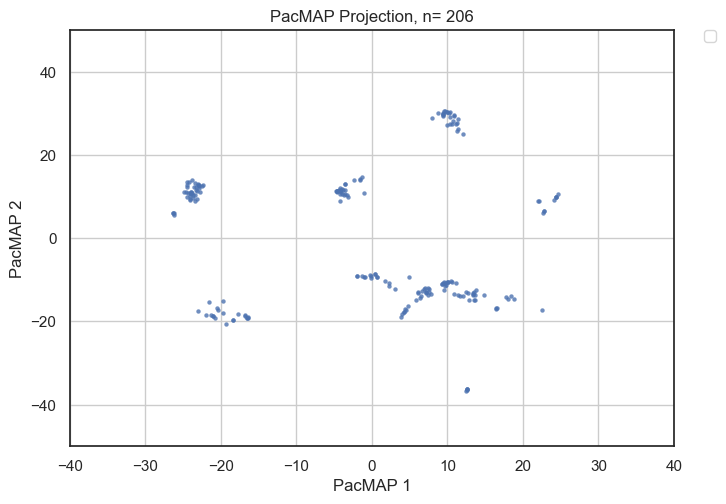

In [22]:
draw_PacMAP(embedding_test2, labels=None)

## Define Nanopore Samples

In [23]:
kasumi2 = kasumi.join(x_train.columns.to_frame(name='index'),how='right').set_index('index').T

In [26]:
reducer = pacmap.PaCMAP(n_components=2, n_neighbors=15, 
                            MN_ratio=0.5, FP_ratio=10.0,random_state=42,
                            lr=0.1, num_iters=4500, verbose=False)
# Fit the training set
embedding2 = reducer.fit_transform(x_train[kasumi2.T['Deci0-MinION'].dropna().index])

c:\ProgramData\mambaforge\lib\site-packages\pacmap\pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


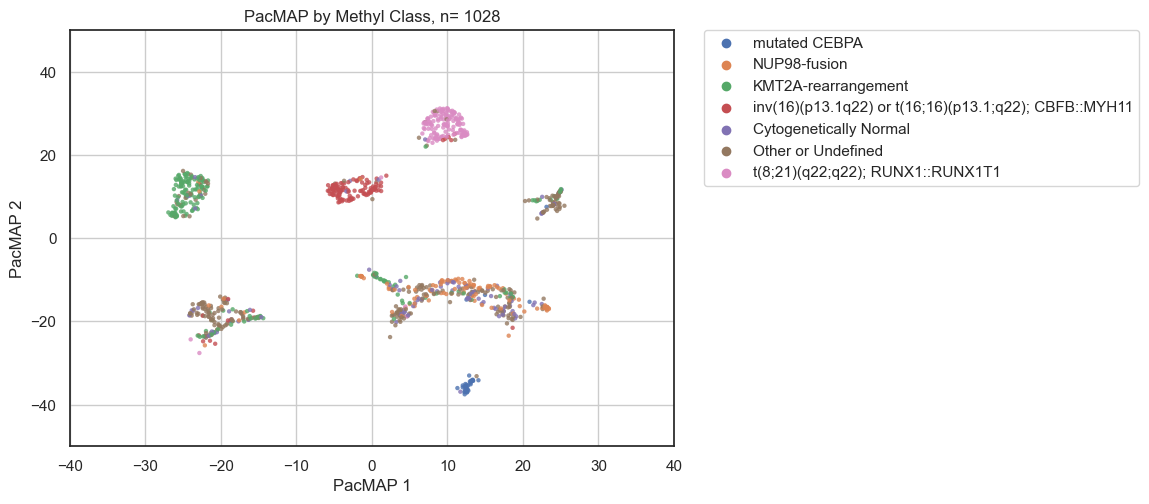

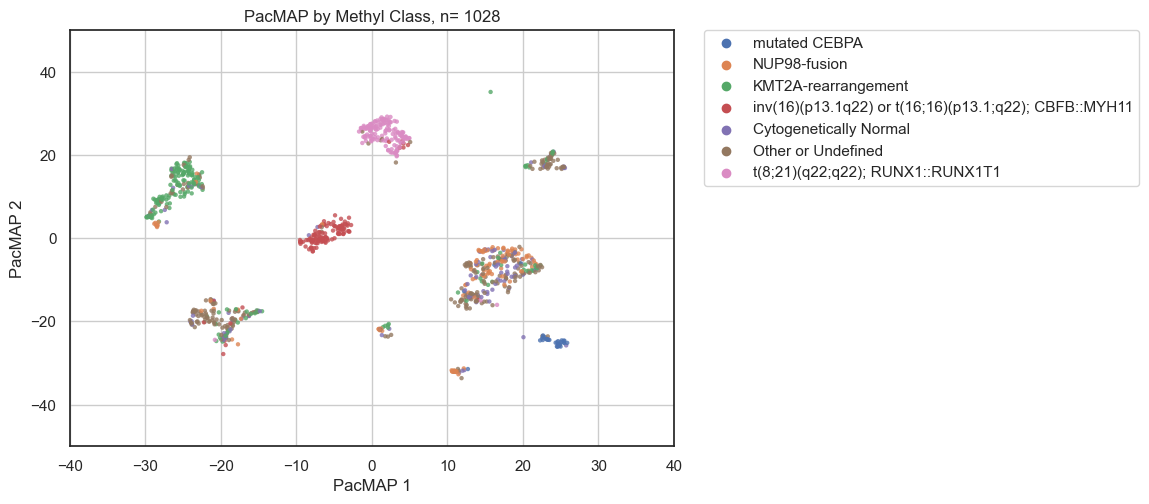

In [32]:
draw_PacMAP(embedding, hue= 'Methyl Class')
draw_PacMAP(embedding2, hue= 'Methyl Class')

In [27]:
embedding2_test2 = reducer.transform(kasumi2.T['Deci0-MinION'].dropna().to_frame().T, basis=x_train[kasumi2.T['Deci0-MinION'].dropna().index].copy())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


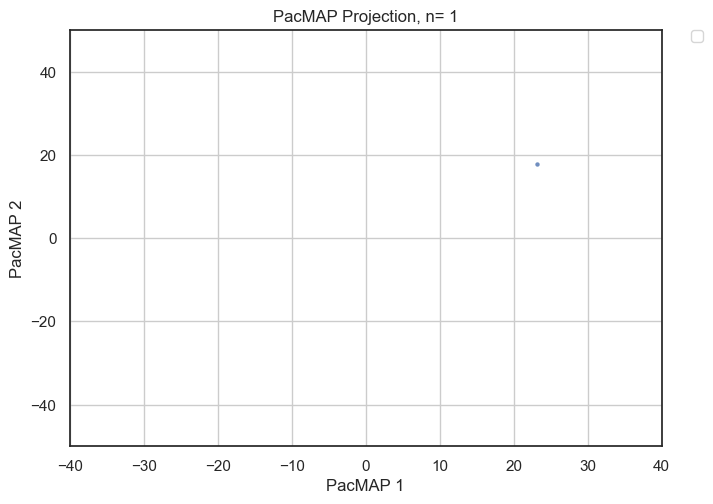

In [34]:
draw_PacMAP(embedding2_test2,labels=None)

In [ ]:
def draw_PacMAP(score,hue=None, labels=y_train):
    
    sns.set_theme(style="white", color_codes=True)

    # Define variables
    score2 = score[:,0:2]
    xs = score2[:,0]
    ys = score2[:,1]

    # Define scatterplot
    plt.subplots(figsize=(7, 5)) 
    sns.scatterplot(data=labels, x=xs, y=ys,
                    s=10,hue=hue,
                    linewidth=0, alpha=0.8)

          
    plt.xlabel("PacMAP 1")
    plt.ylabel("PacMAP 2")
    plt.tight_layout()
    plt.xlim(-40,40)
    plt.ylim(-50,50)
    plt.grid(True)
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Define plot specs

    if hue != None:
        plt.title("PacMAP by " + hue + ", n= "+ str(len(score2)),
                  fontsize = 12)
        plt.savefig('../Figures/PacMAP/' + hue + '.png',
                    bbox_inches='tight', dpi=300)
    else:
        plt.title("PacMAP Projection, n= "+ str(len(score2)),
                  fontsize = 12)
        plt.savefig('../Figures/PacMAP/PacMAP_Projection.png',
                    bbox_inches='tight', dpi=300)

    return(plt.show())